#### [ IRIS 꽃잎 길이기반 너비 예측 모델 ]
- 데이터셋 : iris.csv
- 학습종류 : 지도학습 / 회귀(Regression) 
- 알고리즘 : 분석 후 결정 

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## [1-1] 모듈로딩 
import pandas as pd                                             ## 데이터 분석 및 전처리용 모듈
import matplotlib.pyplot as plt                                 ## 데이터 시각화
from sklearn.model_selection import train_test_split            ## 학습용 / 검증용 / 테스트용 데이터 분리 및 처리용 모듈

In [2]:
## [1-2] 데이터 준비
DATA_FILE = '../data/iris.csv' 

In [3]:
## - "petal.length","petal.width" 2개 컬럼만 추출
irisDF = pd.read_csv(DATA_FILE, usecols=["petal.length","petal.width"])
irisDF

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


[2] 데이터 분석 - 탐색적 데이터 분석 <hr>

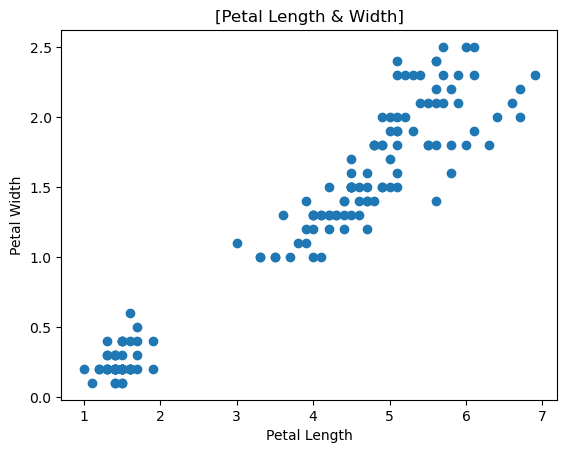

In [4]:
## 시각화 
plt.scatter(irisDF['petal.length'], irisDF['petal.width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('[Petal Length & Width]')
plt.show()

- 탐색적 데이터 분석 결과
    * 데이터 분포 분석 : 길이에 따른 너비가 증가하는 양상 보임
    * 주의 : 품종에 따라서 길이가 모여 있음 
    * 알고리즘 : 선형 회귀로 진행 

[3] 데이터셋 준비 <hr>
- 학습용 데이터셋 : 학습에만 사용되는 데이터셋 => 해당 데이터셋에서 피쳐와 타겟의 규칙/패턴 찾기 
- 검증용 데이터셋 : 학습 중 규칙/패턴 제대로 학습 여부 검사용 
- 테스트용 데이터셋 : 모델 완성 후 테스트용 데이터셋
- Scikit-learn 패키지 특성으로 학습용과 테스트용만 사용 

In [5]:
## [3-1] 피쳐와 타겟 분리 
featureDF = irisDF[["petal.length"]]
targetSR = irisDF["petal.width"]

print(f'featureDF => {featureDF.ndim}D  ,  {featureDF.shape}')
print(f'targetSR  => {targetSR.ndim}D  ,  {targetSR.shape}')

featureDF => 2D  ,  (150, 1)
targetSR  => 1D  ,  (150,)


In [6]:
## [3-2] 학습용과 테스트용 데이터셋 분리 => 학습용 : 테스트용 = 75% : 25%
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    random_state=5)

In [7]:
print(f'X_train => {X_train.ndim}D  ,  {X_train.shape} | y_train => {y_train.ndim}D  ,  {y_train.shape}')
print(f'X_test  => {X_test.ndim}D  ,  {X_test.shape}  | y_test  => {y_test.ndim}D  ,  {y_test.shape}')

X_train => 2D  ,  (112, 1) | y_train => 1D  ,  (112,)
X_test  => 2D  ,  (38, 1)  | y_test  => 1D  ,  (38,)


[4] 학습 진행 <hr>

In [8]:
## 모듈로딩
from sklearn.linear_model import LinearRegression                                             ## 알고리즘 모듈
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error  ## 성능평가 관련 모듈

In [9]:
## [4-1] 학습 객체 생성
lr = LinearRegression()

In [10]:
## [4-2] 학습 진행 => 학습용 데이터셋
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
## -> 학습 후 모델에 적용되는 a, b : 모델 파라미터
print(f'coef_      : {lr.coef_}\nintercept_ : {lr.intercept_}')

coef_      : [0.41794253]
intercept_ : -0.3706155959094948


In [12]:
## [4-3] 학습 평가 
## - 학습용 데이터셋

## - 모델 즉, 수식에 데이터 적용해서 예측값 
pre_y = lr.predict(X_train)

## - 모델 적합도 : 높을 수록 좋음(1.0)
score = lr.score(X_train, pre_y)

## - 오차 계산 : 낮을 수록 좋음 (0.0)
rmse = root_mean_squared_error(y_train, pre_y)

print(f'[X_train] score => {score} ,  rmse => {rmse}')

[X_train] score => 1.0 ,  rmse => 0.20030000303225326


In [13]:
## - 테스트용 데이터셋 ------------------------------------
## - 모델 즉, 수식에 데이터 적용해서 예측값 
pre_y = lr.predict(X_test)

## - 모델 적합도 : 높을 수록 좋음(1.0)
score = lr.score(X_test, pre_y)

## - 오차 계산 : 낮을 수록 좋음 (0.0)
rmse = root_mean_squared_error(y_test, pre_y)

print(f'[X_test] score => {score} ,  rmse => {rmse}')

[X_test] score => 1.0 ,  rmse => 0.218784706145599
